# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [1]:
import pandas as pd
import requests
import missingno as msno

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [2]:
# 3) seu código aqui

sinasc = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5', 'SEXO', 'PESO']]

In [3]:
sinasc.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,PESO
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,3685
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,3055
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,3460
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,2982
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,3310


<Axes: >

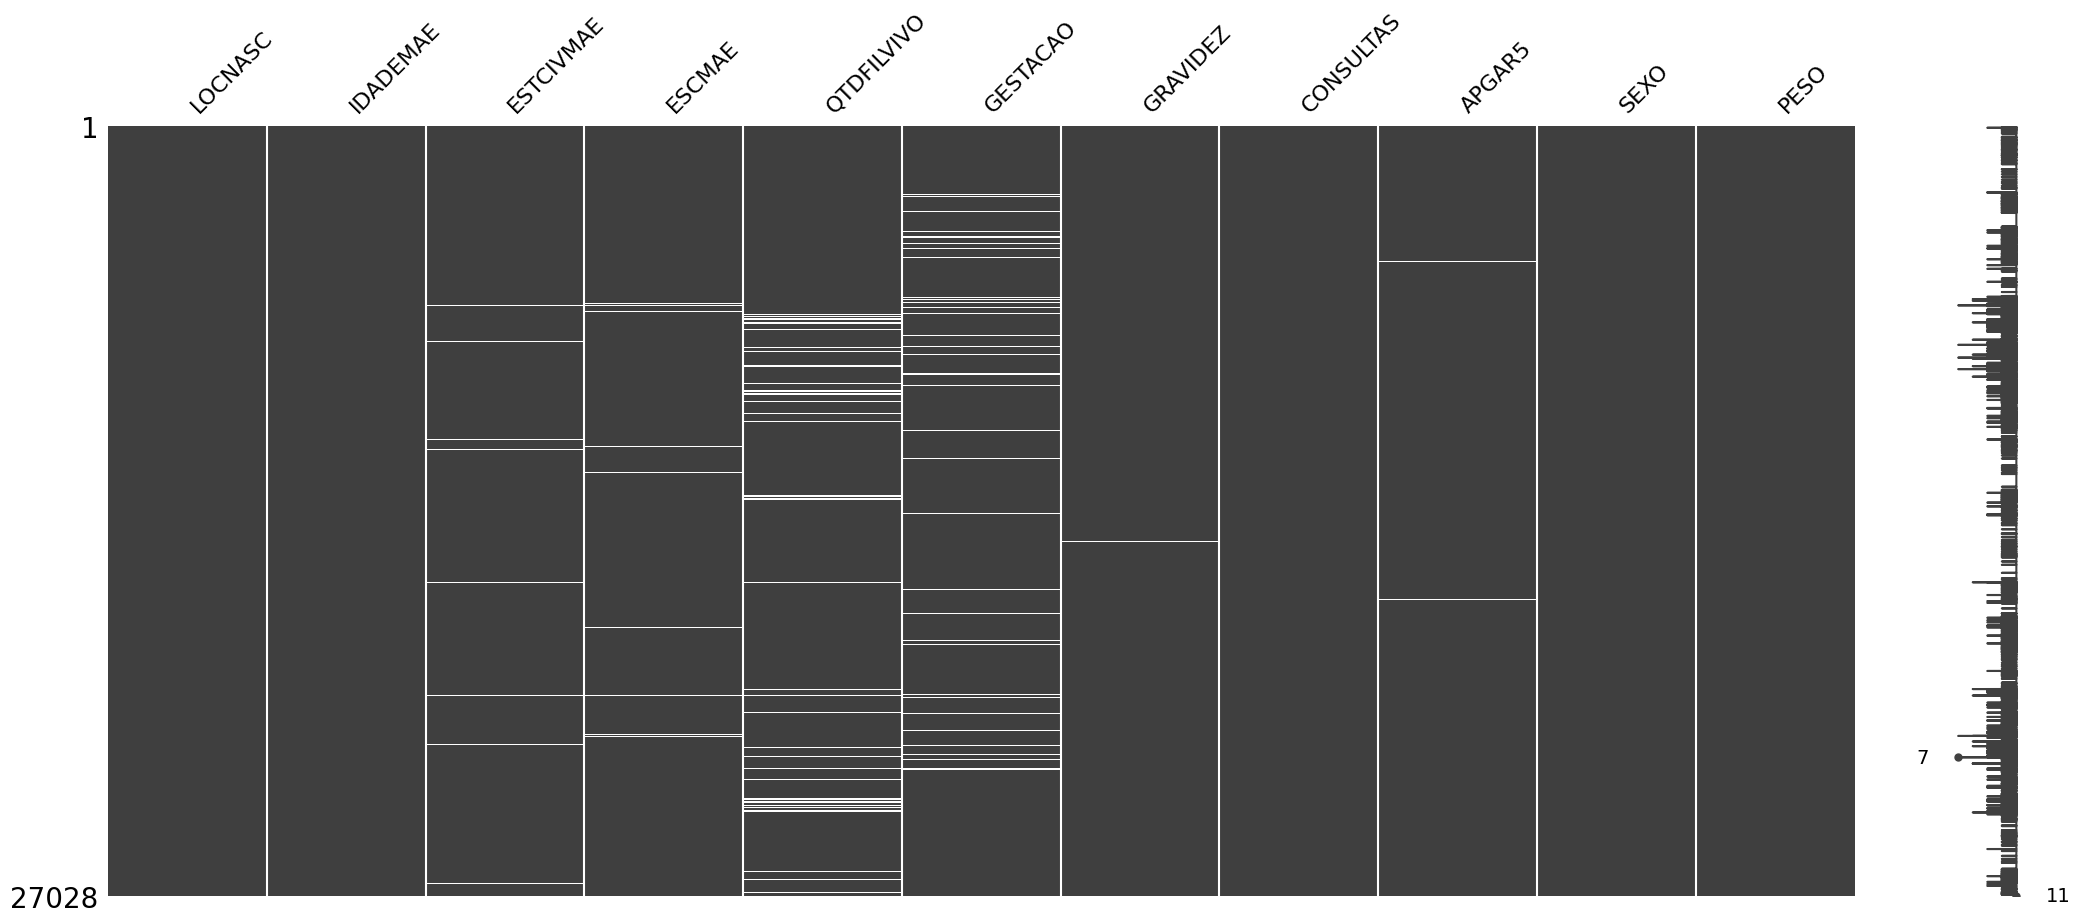

In [4]:
msno.matrix(sinasc)

In [5]:
# 2) seu código aqui
valores_missing = sinasc.isnull().sum()

print(valores_missing)

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
SEXO             4
PESO             0
dtype: int64


In [6]:
# 4) seu código aqui

sinasc = sinasc.dropna(subset=['APGAR5'])
valores_missing = sinasc.isnull().sum()

print(valores_missing)

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
SEXO             4
PESO             0
dtype: int64


In [7]:
# 5) seu código aqui

sinasc['ESTCIVMAE'] = sinasc['ESTCIVMAE'].fillna(9)
sinasc['CONSULTAS'] = sinasc['CONSULTAS'].fillna(9)

valores_missing = sinasc.isnull().sum()

print(valores_missing)

LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
SEXO             4
PESO             0
dtype: int64


In [8]:
# 6) Seu código aqui

sinasc['QTDFILVIVO'] = sinasc['QTDFILVIVO'].fillna(0)

valores_missing = sinasc.isnull().sum()

print(valores_missing)

LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO       0
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
SEXO             4
PESO             0
dtype: int64


In [9]:
# 7) seu código aqui

# Coluna GRAVIDEZ

print('--------------------------------------')
print('Coluna GRAVIDEZ')
contagem = round((sinasc['GRAVIDEZ'].value_counts(normalize=True) * 100), 2)
print(f'{contagem}\n')

sinasc['GRAVIDEZ'] = sinasc['GRAVIDEZ'].fillna('Única') 

# Coluna ESCMAE

print('--------------------------------------')
print('Coluna ESCMAE')
contagem = round((sinasc['ESCMAE'].value_counts(normalize=True) * 100), 2)
print(f'{contagem}\n')

sinasc['ESCMAE'] = sinasc['ESCMAE'].fillna('8 a 11 anos') 


# Coluna GESTACAO

print('--------------------------------------')
print('Coluna GESTACAO')
contagem = round((sinasc['GESTACAO'].value_counts(normalize=True) * 100), 2)
print(f'{contagem}\n')

sinasc['GESTACAO'] = sinasc['GESTACAO'].fillna('37 a 41 semanas') 

print('--------------------------------------')
valores_missing = sinasc.isnull().sum()
print(valores_missing)

--------------------------------------
Coluna GRAVIDEZ
GRAVIDEZ
Única              98.16
Dupla               1.82
Tríplice e mais     0.02
Name: proportion, dtype: float64

--------------------------------------
Coluna ESCMAE
ESCMAE
8 a 11 anos        58.54
12 anos ou mais    21.63
4 a 7 anos         17.76
1 a 3 anos          1.92
Nenhuma             0.15
Name: proportion, dtype: float64

--------------------------------------
Coluna GESTACAO
GESTACAO
37 a 41 semanas        87.61
32 a 36 semanas         8.69
42 semanas e mais       2.72
28 a 31 semanas         0.63
22 a 27 semanas         0.33
Menos de 22 semanas     0.03
Name: proportion, dtype: float64

--------------------------------------
LOCNASC       0
IDADEMAE      0
ESTCIVMAE     0
ESCMAE        0
QTDFILVIVO    0
GESTACAO      0
GRAVIDEZ      0
CONSULTAS     0
APGAR5        0
SEXO          4
PESO          0
dtype: int64


In [10]:
sinasc.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,SEXO,PESO
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Masculino,3685
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Feminino,3055
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,Feminino,3460
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Feminino,2982
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Feminino,3310


In [11]:
sinasc.to_csv('sinasc.csv')

In [12]:
# 8) seu código aqui

def status_apgar(valor):
    valor = int(valor)
    status = None

    if (valor >= 8) & (valor <= 10):
        status = 'normal'
    elif (valor >= 6) & (valor <= 7):
        status = 'asfixia leve'
    elif (valor >= 4) & (valor <= 5):
        status = 'asfixia moderada'
    else:
        status = 'asfixia severa'
    
    return status

sinasc['status_apgar5'] = sinasc['APGAR5'].apply(status_apgar)

contagem = round((sinasc['status_apgar5'].value_counts(normalize=True) * 100), 2)
print(f'{contagem}\n')

status_apgar5
normal              98.28
asfixia leve         1.19
asfixia severa       0.27
asfixia moderada     0.25
Name: proportion, dtype: float64



In [13]:
# 9) seu código aqui

colunas = sinasc.columns
colunas_minusculas = []

for x in colunas:
    x = x.lower()
    colunas_minusculas.append(x)

sinasc.columns = colunas_minusculas